#### Import Libraries

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler,  MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Load and Integrate Data

In [3]:
# Load datasets
movies = pd.read_csv('movies.csv')  
ratings = pd.read_csv('ratings.csv')   
tags = pd.read_csv('tags.csv') 

In [3]:
# check top rows for movies
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [4]:
# check top rows for ratings
ratings.head(2)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247


In [4]:
# check top rows for ratings
tags.head(2)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996


In [6]:
# check dataset shape
print("Shape of movies:", movies.shape)
print("Shape of ratings:", ratings.shape)
print("Shape of tags:", tags.shape)

Shape of movies: (9742, 3)
Shape of ratings: (100836, 4)
Shape of tags: (3683, 4)


In [7]:
# Check data type for movies
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [8]:
# Check data type for rating
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [9]:
# Check data type for tag
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


#### 2. Data Cleaning

In [10]:
# Checking for missing values
print("Missing values in movies:")
print(movies.isnull().sum())
print("\nMissing values in ratings:")
print(ratings.isnull().sum())
print("\nMissing values in tags:")
print(tags.isnull().sum())

Missing values in movies:
movieId    0
title      0
genres     0
dtype: int64

Missing values in ratings:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Missing values in tags:
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


* There are no missing rows in all the dataset

In [16]:
#split the movie genre
movies['genres'] = movies['genres'].str.split('|') 

In [17]:
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"


In [11]:
# Cleaning Tag
tags['tag_clean'] = tags['tag'].str.lower().str.replace(r'[^a-z0-9]', '', regex=True)

#### 3. Pre-processing and Feature Generation

##### a. Ratings

In [11]:
# extract datetime, hour, weekday
ratings['datetime'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings['hour'] = ratings['datetime'].dt.hour
ratings['weekday'] = ratings['datetime'].dt.dayofweek

In [12]:
ratings.head(2)

,userId,movieId,rating,timestamp,datetime,hour,weekday
0,1,1,4.0,964982703,2000-07-30 18:45:03,18,6
1,1,3,4.0,964981247,2000-07-30 18:20:47,18,6


In [12]:
# convert taf timestamp to date
tags['datetime'] = pd.to_datetime(tags['timestamp'], unit='s')

In [18]:
df = movies.merge(ratings, on='movieId', how='left')
df = df.merge(tags, on='movieId', how='left')

In [19]:
df.head()

,movieId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y,tag_clean,datetime
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1.0,4.0,964982703.0,336.0,pixar,1.139046e+09,pixar,2006-02-04 09:36:04
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1.0,4.0,964982703.0,474.0,pixar,1.137207e+09,pixar,2006-01-14 02:47:05
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1.0,4.0,964982703.0,567.0,fun,1.525286e+09,fun,2018-05-02 18:33:33
3,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",5.0,4.0,847434962.0,336.0,pixar,1.139046e+09,pixar,2006-02-04 09:36:04
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",5.0,4.0,847434962.0,474.0,pixar,1.137207e+09,pixar,2006-01-14 02:47:05


In [15]:
df.shape

(285783, 11)

### Exploratory Data Analysis - Data Visualization

##### Univariate

Text(0.5, 1.0, 'Rating Distribution')

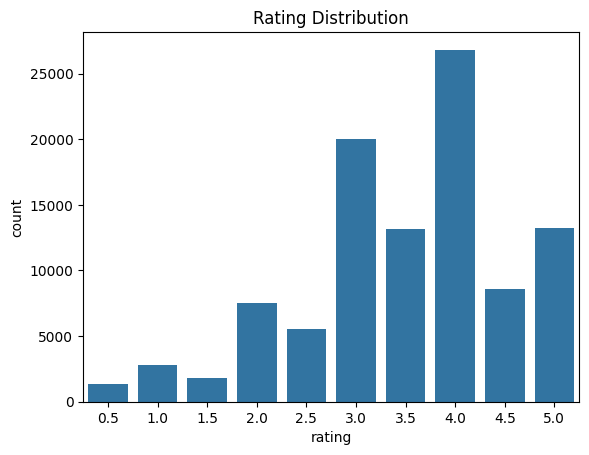

In [21]:
# Rating Distribution
sns.countplot(x='rating', data=ratings)
plt.title('Rating Distribution')

Text(0.5, 1.0, 'Ratings per Movie')

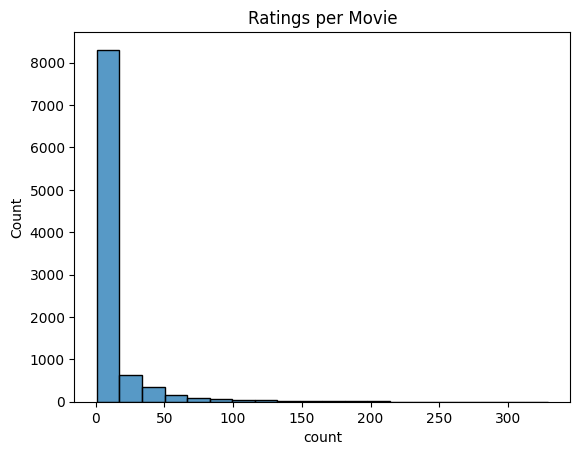

In [23]:
# Movie Popularity
movie_counts = ratings['movieId'].value_counts()
sns.histplot(movie_counts, bins=20)
plt.title('Ratings per Movie')

Text(0.5, 1.0, 'Top 10 Genres')

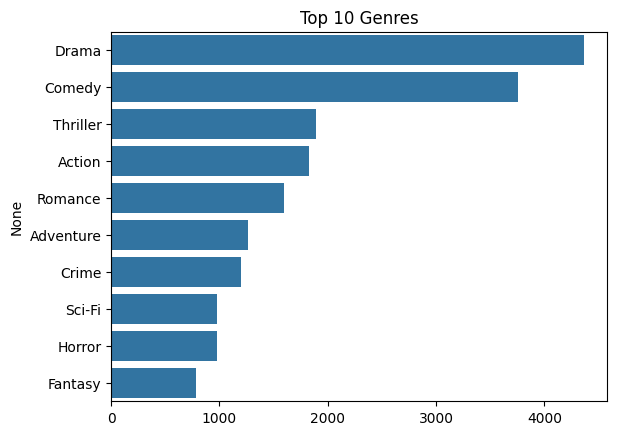

In [26]:
# Genre Frequency
genre_counts = genres_encoded.sum().sort_values(ascending=False)
sns.barplot(x=genre_counts.values[:10], y=genre_counts.index[:10])
plt.title('Top 10 Genres')

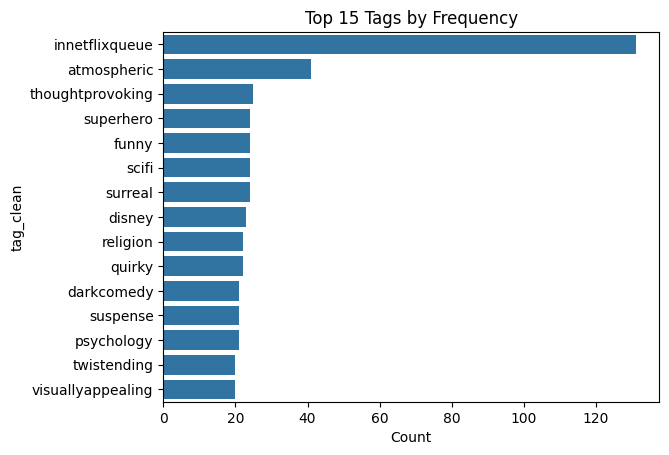

In [28]:
# Tag Usage
tag_counts = tags.groupby(['movieId', 'tag_clean']).size().unstack(fill_value=0)
tag_freq = tag_counts.sum().sort_values(ascending=False)

sns.barplot(x=tag_freq.head(15).values, y=tag_freq.head(15).index)
plt.title('Top 15 Tags by Frequency')
plt.xlabel('Count')
plt.show()

##### Bivariate

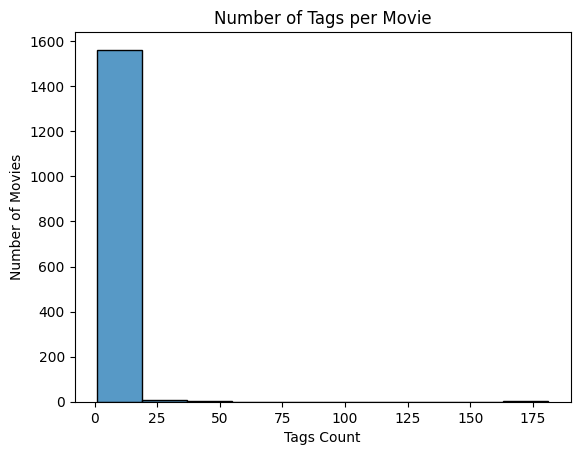

In [30]:
# Tags per moview
sns.histplot(tag_counts.sum(axis=1), bins=10)
plt.title('Number of Tags per Movie')
plt.xlabel('Tags Count')
plt.ylabel('Number of Movies')
plt.show()

Text(0.5, 1.0, 'Count vs Average Rating')

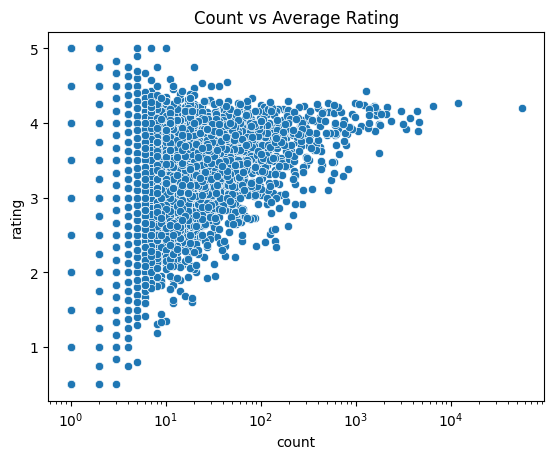

In [ ]:
# Ratings popularity
popularity = df.groupby('movieId').agg({'rating':'mean','movieId':'count'}).rename(columns={'movieId':'count'})
sns.scatterplot(x=popularity['count'], y=popularity['rating'])
plt.xscale('log'); plt.title('Count vs Average Rating')


##### Data Preprocessing

In [24]:
# Generate Movie Features and Transform Genre
mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(mlb.fit_transform(movies['genres']),
                              columns=mlb.classes_,
                              index=movies.index)

movies_feats = pd.concat([movies[['movieId','title']], genres_encoded], axis=1)

In [14]:
movies_feats.head(2)

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Merge Ratings, Movies, Tags
df = ratings.merge(movies_feats, on='movieId', how='left').fillna(0)

In [16]:
df.head()

,userId,movieId,rating,timestamp,datetime,hour,weekday,title,(no genres listed),Action,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1,4.0,964982703,2000-07-30 18:45:03,18,6,Toy Story (1995),0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,3,4.0,964981247,2000-07-30 18:20:47,18,6,Grumpier Old Men (1995),0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,6,4.0,964982224,2000-07-30 18:37:04,18,6,Heat (1995),0,1,...,0,0,0,0,0,0,0,1,0,0
3,1,47,5.0,964983815,2000-07-30 19:03:35,19,6,Seven (a.k.a. Se7en) (1995),0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,50,5.0,964982931,2000-07-30 18:48:51,18,6,"Usual Suspects, The (1995)",0,0,...,0,0,0,0,1,0,0,1,0,0


In [18]:
# Create Features for User stats and movie stats
user_stats = df.groupby('userId')['rating'].agg(['mean', 'count'])\
               .rename(columns={'mean':'user_avg','count':'user_count'})
movie_stats = df.groupby('movieId')['rating'].agg(['mean', 'count'])\
                .rename(columns={'mean':'movie_avg','count':'movie_count'})

df = df.join(user_stats, on='userId').join(movie_stats, on='movieId')

##### 4. Standardization & Variance Filter

In [19]:
# columns selection
exclude_cols = ['userId','movieId','rating','timestamp','datetime']
feature_cols = [c for c in df.columns if c not in exclude_cols]

##### Normalization/Standardization

In [22]:
# Normalize features to [0,1]
scaler = MinMaxScaler()

# Identify numeric feature columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Exclude ID & target columns from numeric processing
numeric_feature_cols = [c for c in numeric_cols if c not in ['userId','movieId','rating','timestamp']]

# 1. Normalize numeric features
scaler = MinMaxScaler()
df[numeric_feature_cols] = scaler.fit_transform(df[numeric_feature_cols])

##### Variance Filter

In [ ]:
# Apply VarianceThreshold on numeric columns 
X_numeric = df[numeric_feature_cols].values
sel = VarianceThreshold(threshold=0.001)
X_reduced = sel.fit_transform(X_numeric)

In [25]:
# Keep selected feature names
selected_cols = [col for col, keep in zip(feature_cols, sel.get_support()) if keep]

In [26]:
# Build Final Cleaned and Reduced DataFrame
df_pruned = pd.concat([
    df[['userId','movieId','rating']],
    pd.DataFrame(X_reduced, columns=selected_cols, index=df.index)
], axis=1)

In [28]:
df_pruned.head()

,userId,movieId,rating,hour,weekday,(no genres listed),Action,Adventure,Animation,Children,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user_avg,user_count,movie_avg
0,1,1,4.0,0.782609,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.8299,0.079164,0.760207,0.652439
1,1,3,4.0,0.782609,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.8299,0.079164,0.613248,0.155488
2,1,6,4.0,0.782609,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.8299,0.079164,0.765795,0.307927
3,1,47,5.0,0.826087,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.8299,0.079164,0.772304,0.615854
4,1,50,5.0,0.782609,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.8299,0.079164,0.830610,0.618902


In [27]:
# Save processed and cleaned datasets
df_pruned.to_csv('netflix_cleaned_data.csv', index=False)